### **Buscar el time series más corto**

In [1]:
min_samples = 832

### **Hacer reshape de todos los experimentos a tener 832 (Todos los time series)**

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from scipy import signal

size = 832
files = glob('Z:\Descargas\composite\CSV_DATA\*.csv')
for file in files:
    df = pd.read_csv(file)
    col_names = ('Flow rate', 'Pressure')    
    cols = [col for col in df if col.endswith(col_names)]    
    resampled_df = pd.DataFrame(signal.resample(df[cols], min_samples), columns=cols)
    resampled_df['TOTAL_QUALITY'] = df['TOTAL_QUALITY']
    resampled_df.to_csv(file.replace('CSV_DATA', 'deepl\CSV_DATA_RESAMPLED'), index=False)

### **Generar dataset de train (15% de los correctos concatenados uno debajo del otro)**

In [3]:
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\composite\deepl\CSV_DATA_RESAMPLED\*.csv')
np.random.shuffle(files)

n_files = int(len(files) * 0.5) # 15% de los datos correctos

df_list = []

for file in files:
    df = pd.read_csv(file)
    if df.iloc[:,-1][0] == 1:
        df_list.append(df)
    if len(df_list) == n_files:
        break
        
print(len(df_list))

5007


In [4]:
df = pd.concat(df_list)
df = df.iloc[:,:-1]
df

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.855292e-07,2395.405181,2829.470990,2969.865589,2888.748720,2723.548636,2520.842698,2944.084777,3160.860839,3264.496397,...,3472.616313,3163.352154,2832.140765,2633.686730,3924.045897,4307.814912,4596.578906,3953.530663,3345.856810,2862.021735
1,7.296608e-07,-820.633782,-968.328226,-1017.956417,-993.786730,-943.551976,-882.852995,-1025.921823,-1094.143254,-1122.032470,...,-1196.846865,-1099.622625,-996.431089,-939.263761,-1370.951818,-1499.272613,-1600.275759,-1373.462665,-1170.174290,-1013.716861
2,8.694531e-07,452.103405,531.815611,559.311912,547.625140,523.658867,495.927713,577.123843,610.119158,619.536284,...,661.472745,612.518542,561.056829,535.642736,773.013826,841.318887,898.145341,766.939550,656.251352,573.790947
3,8.010960e-07,-298.331507,-349.249947,-367.185220,-360.438157,-347.236996,-333.171177,-389.594409,-407.767772,-409.256118,...,-436.945809,-407.771519,-377.468347,-364.935626,-522.839502,-565.997527,-604.280125,-512.601073,-440.106371,-387.870857
4,1.300280e-06,215.838844,251.072976,263.718633,259.498571,251.984566,245.202314,288.746871,298.926486,296.073311,...,315.892116,297.189133,278.079944,272.310065,388.101763,417.712166,445.983151,375.430143,323.308430,287.065042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-1.048618e-08,46482.261647,50081.406438,49755.465583,47890.493246,43735.414975,36259.275237,65156.184212,56332.488989,54385.974895,...,58630.575404,53576.098088,45951.900043,41436.676450,52311.451851,59786.949858,68360.249152,76707.490104,62582.863783,48020.866175
828,1.201613e-08,45947.042184,49503.678256,49197.893726,47383.395078,43327.049404,36016.183278,64378.290578,55662.886542,53746.346356,...,57973.384490,53000.437147,45495.433971,41059.165682,51665.945403,59060.456649,67539.083482,75796.963888,61873.654667,47514.679961
829,-1.426187e-08,46914.194216,50659.255276,50510.443701,48839.301971,44924.008590,37843.528615,65481.143693,56755.731548,54935.444155,...,59393.703760,54458.834041,46947.644176,42469.143220,52720.140048,60293.238726,68933.291812,77326.067126,63321.298545,48809.772188
830,1.797274e-08,46120.799302,49871.194135,49836.017509,48331.717497,44682.201298,38045.900583,64207.076260,55733.166755,54034.739715,...,58536.692559,53797.476873,46543.404164,42205.683274,51769.721602,59229.594826,67719.681820,75952.881109,62354.250447,48227.676164


In [5]:
df.to_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv', index=False)

### **Normalizar los datos con MinMaxScaler**

In [1]:
import pandas as pd

train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv')
train.shape

(4165824, 29)

In [2]:
train

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.855292e-07,2395.405181,2829.470990,2969.865589,2888.748720,2723.548636,2520.842698,2944.084777,3160.860839,3264.496397,...,3472.616313,3163.352154,2832.140765,2633.686730,3924.045897,4307.814912,4596.578906,3953.530663,3345.856810,2862.021735
1,7.296608e-07,-820.633782,-968.328226,-1017.956417,-993.786730,-943.551976,-882.852995,-1025.921823,-1094.143254,-1122.032470,...,-1196.846865,-1099.622625,-996.431089,-939.263761,-1370.951818,-1499.272613,-1600.275759,-1373.462665,-1170.174290,-1013.716861
2,8.694531e-07,452.103405,531.815611,559.311912,547.625140,523.658867,495.927713,577.123843,610.119158,619.536284,...,661.472745,612.518542,561.056829,535.642736,773.013826,841.318887,898.145341,766.939550,656.251352,573.790947
3,8.010960e-07,-298.331507,-349.249947,-367.185220,-360.438157,-347.236996,-333.171177,-389.594409,-407.767772,-409.256118,...,-436.945809,-407.771519,-377.468347,-364.935626,-522.839502,-565.997527,-604.280125,-512.601073,-440.106371,-387.870857
4,1.300280e-06,215.838844,251.072976,263.718633,259.498571,251.984566,245.202314,288.746871,298.926486,296.073311,...,315.892116,297.189133,278.079944,272.310065,388.101763,417.712166,445.983151,375.430143,323.308430,287.065042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165819,-1.048618e-08,46482.261647,50081.406438,49755.465583,47890.493246,43735.414975,36259.275237,65156.184212,56332.488989,54385.974895,...,58630.575404,53576.098088,45951.900043,41436.676450,52311.451851,59786.949858,68360.249152,76707.490104,62582.863783,48020.866175
4165820,1.201613e-08,45947.042184,49503.678256,49197.893726,47383.395078,43327.049404,36016.183278,64378.290578,55662.886542,53746.346356,...,57973.384490,53000.437147,45495.433971,41059.165682,51665.945403,59060.456649,67539.083482,75796.963888,61873.654667,47514.679961
4165821,-1.426187e-08,46914.194216,50659.255276,50510.443701,48839.301971,44924.008590,37843.528615,65481.143693,56755.731548,54935.444155,...,59393.703760,54458.834041,46947.644176,42469.143220,52720.140048,60293.238726,68933.291812,77326.067126,63321.298545,48809.772188
4165822,1.797274e-08,46120.799302,49871.194135,49836.017509,48331.717497,44682.201298,38045.900583,64207.076260,55733.166755,54034.739715,...,58536.692559,53797.476873,46543.404164,42205.683274,51769.721602,59229.594826,67719.681820,75952.881109,62354.250447,48227.676164


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
train.shape

(4165824, 29)

### **Definir modelo LSTM-AutoEncoder**

In [4]:
# reshape input into [samples, timesteps, features]

n_samples = 5007
n_steps = 832
n_features = train.shape[1]
train = train.reshape((n_samples, n_steps, n_features))

train.shape

(5007, 832, 29)

In [5]:
# https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network
# https://machinelearningmastery.com/how-to-avoid-exploding-gradients-in-neural-networks-with-gradient-clipping/

In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

model = models.Sequential([
    layers.LSTM(16, dropout=0.1, recurrent_dropout=0.2, activation='relu', return_sequences=True, input_shape=(train.shape[1], train.shape[2])),
    layers.LSTM(8, dropout=0.1, recurrent_dropout=0.2, activation='relu', return_sequences=False),
    layers.RepeatVector(train.shape[1]),
    layers.LSTM(8, dropout=0.1, recurrent_dropout=0.2, activation='relu', return_sequences=True),
    layers.LSTM(16, dropout=0.1, recurrent_dropout=0.2, activation='relu', return_sequences=True),
    layers.TimeDistributed(layers.Dense(train.shape[2]))
])

opt = SGD(lr=0.01, momentum=0.9, nesterov=True, clipnorm=0.5)

model.compile(optimizer=opt, loss='mae')

early_stop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

history = model.fit(train, train, callbacks=early_stop, epochs=5, batch_size=64, validation_split=0.1)

Train on 4506 samples, validate on 501 samples
Epoch 1/5
4506/4506 [==============================] - 344s 76ms/sample - loss: 0.0188 - val_loss: 5.7704e-04
Epoch 2/5
4506/4506 [==============================] - 336s 75ms/sample - loss: 6.1025e-04 - val_loss: 5.0612e-04
Epoch 3/5
4506/4506 [==============================] - 355s 79ms/sample - loss: 5.2265e-04 - val_loss: 4.7510e-04
Epoch 4/5
4506/4506 [==============================] - 356s 79ms/sample - loss: 5.0277e-04 - val_loss: 4.9096e-04
Epoch 5/5
4506/4506 [==============================] - 323s 72ms/sample - loss: 4.9798e-04 - val_loss: 5.1561e-04


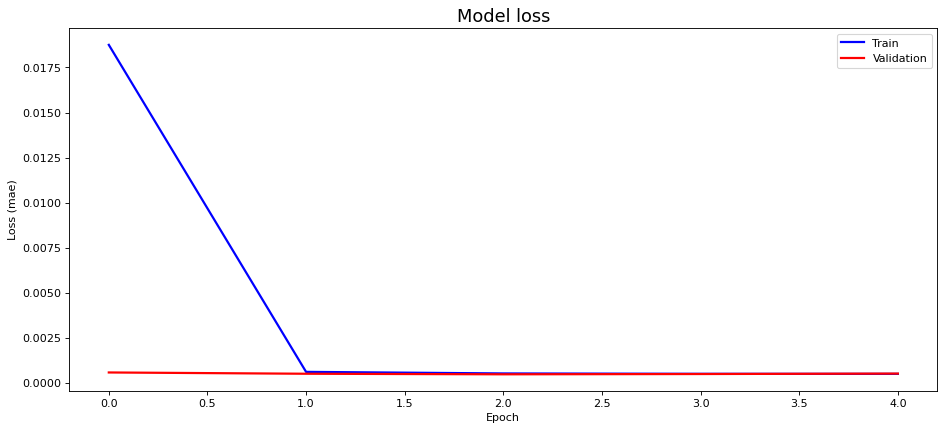

In [7]:
from matplotlib import pyplot as plt

# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [8]:
model.save('models/lstm_autoencoder_model.h5') 

### **Calcular threshold**

In [9]:
from tensorflow.keras.models import load_model

model = load_model('models/lstm_autoencoder_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 832, 16)           2944      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 832, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 832, 8)            544       
_________________________________________________________________
lstm_3 (LSTM)                (None, 832, 16)           1600      
_________________________________________________________________
time_distributed (TimeDistri (None, 832, 29)           493       
Total params: 6,381
Trainable params: 6,381
Non-trainable params: 0
______________________________________________________

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# load
train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv')

# normalize
scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)

# reshape
n_samples = 5007
n_steps = 832
n_features = train.shape[1]
train = train.reshape((n_samples, n_steps, n_features))

# predict
pred_train = model.predict(train)
pred_train.shape

(5007, 832, 29)

In [11]:
import numpy as np
mean = np.mean(np.abs(pred_train-train), axis=1)
print(mean.shape)
mean = np.mean(mean, axis=1)
print(mean.shape)

threshold = mean.mean()+3*mean.std()
threshold

(5007, 29)
(5007,)


0.0007533503684162789

In [12]:
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\composite\deepl\CSV_DATA_RESAMPLED\*.csv')
np.random.shuffle(files)

n_files = int(len(files) * 0.15) # 15% de los datos incorrectos

df_list = []

for file in files:
    df = pd.read_csv(file)
    if df.iloc[:,-1][0] == 0:
        df_list.append(df)
    if len(df_list) == n_files:
        break
        
print(len(df_list))

1502


In [14]:
test = pd.concat(df_list)
test = test.iloc[:,:-1]

test = scaler.transform(test)
test = test.reshape((1502, n_steps, n_features))

pred_test = model.predict(test)

In [15]:
draw_train = np.mean(np.abs(pred_train-train), axis=1)
draw_train = np.mean(draw_train, axis=1)

draw_test = np.mean(np.abs(pred_test-test), axis=1)
draw_test = np.mean(draw_test, axis=1)

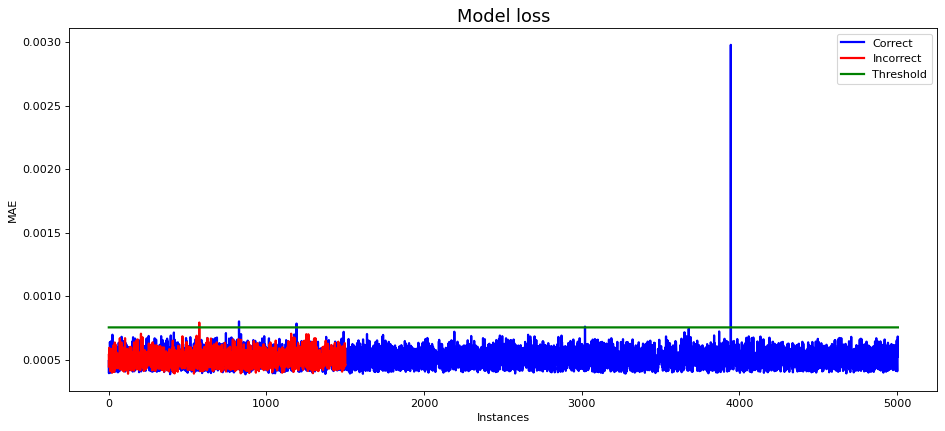

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(draw_train, 'b', label='Correct', linewidth=2)
ax.plot(draw_test, 'r', label='Incorrect', linewidth=2)
ax.plot(np.full(shape=5007, fill_value=threshold), 'g', label='Threshold', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('MAE')
ax.set_xlabel('Instances')
ax.legend(loc='upper right')
plt.show()